In [1]:
import pandas as pd
import numpy as np
#from glob import glob

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pd.set_option("display.max_columns", 500)
plt.style.use("seaborn-colorblind")
pal = sns.color_palette()

<ipython-input-1-bc7a13b57ee8>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


In [2]:
df = pd.read_csv('/content/drive/MyDrive/TIH-IITroorkee/BTS-Washington_jan_may_2024.csv')
df.head()

,Unnamed: 0,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_CARRIER,MKT_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME
0,0,2024,1,1,1,1,1/1/2024 12:00:00 AM,AA,1471,AA,AA,N432AN,1471,14747,SEA,"Seattle, WA",WA,13303,MIA,"Miami, FL",FL,2234,2231.0,-3.0,0.0,0.0,13.0,12.0,714,706.0,-8.0,0.0,0.0,0.0,NaN,0.0,340.0,335.0,310.0,1.0,2724.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2024,1,1,1,1,1/1/2024 12:00:00 AM,AA,1667,AA,AA,N464AA,1667,14747,SEA,"Seattle, WA",WA,11298,DFW,"Dallas/Fort Worth, TX",TX,718,710.0,-8.0,0.0,0.0,15.0,12.0,1307,1259.0,-8.0,0.0,0.0,0.0,NaN,0.0,229.0,229.0,202.0,1.0,1660.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2024,1,1,1,1,1/1/2024 12:00:00 AM,AA,1819,AA,AA,N445AA,1819,14747,SEA,"Seattle, WA",WA,13303,MIA,"Miami, FL",FL,1229,1224.0,-5.0,0.0,0.0,20.0,16.0,2110,2112.0,2.0,2.0,0.0,0.0,NaN,0.0,341.0,348.0,312.0,1.0,2724.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2024,1,1,1,1,1/1/2024 12:00:00 AM,AA,1992,AA,AA,N421UW,1992,14747,SEA,"Seattle, WA",WA,11298,DFW,"Dallas/Fort Worth, TX",TX,1346,1341.0,-5.0,0.0,0.0,27.0,11.0,1938,1944.0,6.0,6.0,0.0,0.0,NaN,0.0,232.0,243.0,205.0,1.0,1660.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2024,1,1,1,1,1/1/2024 12:00:00 AM,AA,2001,AA,AA,N462AA,2001,14747,SEA,"Seattle, WA",WA,14100,PHL,"Philadelphia, PA",PA,2301,2250.0,-11.0,0.0,0.0,14.0,5.0,700,648.0,-12.0,0.0,0.0,0.0,NaN,0.0,299.0,298.0,279.0,1.0,2378.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
flight_data = df
flight_data.head()

,Unnamed: 0,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_CARRIER,MKT_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME
0,0,2024,1,1,1,1,1/1/2024 12:00:00 AM,AA,1471,AA,AA,N432AN,1471,14747,SEA,"Seattle, WA",WA,13303,MIA,"Miami, FL",FL,2234,2231.0,-3.0,0.0,0.0,13.0,12.0,714,706.0,-8.0,0.0,0.0,0.0,NaN,0.0,340.0,335.0,310.0,1.0,2724.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2024,1,1,1,1,1/1/2024 12:00:00 AM,AA,1667,AA,AA,N464AA,1667,14747,SEA,"Seattle, WA",WA,11298,DFW,"Dallas/Fort Worth, TX",TX,718,710.0,-8.0,0.0,0.0,15.0,12.0,1307,1259.0,-8.0,0.0,0.0,0.0,NaN,0.0,229.0,229.0,202.0,1.0,1660.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2024,1,1,1,1,1/1/2024 12:00:00 AM,AA,1819,AA,AA,N445AA,1819,14747,SEA,"Seattle, WA",WA,13303,MIA,"Miami, FL",FL,1229,1224.0,-5.0,0.0,0.0,20.0,16.0,2110,2112.0,2.0,2.0,0.0,0.0,NaN,0.0,341.0,348.0,312.0,1.0,2724.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2024,1,1,1,1,1/1/2024 12:00:00 AM,AA,1992,AA,AA,N421UW,1992,14747,SEA,"Seattle, WA",WA,11298,DFW,"Dallas/Fort Worth, TX",TX,1346,1341.0,-5.0,0.0,0.0,27.0,11.0,1938,1944.0,6.0,6.0,0.0,0.0,NaN,0.0,232.0,243.0,205.0,1.0,1660.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2024,1,1,1,1,1/1/2024 12:00:00 AM,AA,2001,AA,AA,N462AA,2001,14747,SEA,"Seattle, WA",WA,14100,PHL,"Philadelphia, PA",PA,2301,2250.0,-11.0,0.0,0.0,14.0,5.0,700,648.0,-12.0,0.0,0.0,0.0,NaN,0.0,299.0,298.0,279.0,1.0,2378.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
flight_data.columns

Index(['Unnamed: 0', 'YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'FL_DATE', 'MKT_CARRIER', 'MKT_CARRIER_FL_NUM', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'DEST_AIRPORT_ID',
       'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'TAXI_OUT', 'TAXI_IN',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'FIRST_DEP_TIME'],
      dtype='object')

In [5]:
# creating new variables and renaming
flight_data['DepDate'] = pd.to_datetime(flight_data.YEAR*10000+flight_data.MONTH*100+flight_data.DAY_OF_MONTH,format='%Y%m%d')

#Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)
for dataset in flight_data:
    flight_data.loc[flight_data['ARR_DELAY'] <= 15, 'Status'] = 0
    flight_data.loc[flight_data['ARR_DELAY'] >= 15, 'Status'] = 1
    flight_data.loc[flight_data['ARR_DELAY'] >= 60, 'Status'] = 2
    flight_data.loc[flight_data['DIVERTED'] == 1, 'Status'] = 3
    flight_data.loc[flight_data['CANCELLED'] == 1, 'Status'] = 4

    #Cancellation cause
flight_data.loc[flight_data["CANCELLATION_CODE"] =="A", 'CANCELLATION_CODE'] = "0"
flight_data.loc[flight_data["CANCELLATION_CODE"] =="B", 'CANCELLATION_CODE'] = "1"
flight_data.loc[flight_data["CANCELLATION_CODE"] =="C", 'CANCELLATION_CODE'] = "2"
flight_data.loc[flight_data["CANCELLATION_CODE"] =="D", 'CANCELLATION_CODE'] = "3"

# dropping the unwanted data
flight_data = flight_data.drop("Unnamed: 0",axis=1) #Empty
#Converted to date
flight_data = flight_data.drop("YEAR",axis=1)
flight_data = flight_data.drop("DAY_OF_MONTH",axis=1) #Converted to date
flight_data = flight_data.drop("DEP_TIME",axis=1) #Of the departure data we only keep the expected
flight_data = flight_data.drop("DEP_DELAY",axis=1)
flight_data = flight_data.drop("ARR_TIME",axis=1)
flight_data = flight_data.drop("CRS_ARR_TIME",axis=1)
flight_data = flight_data.drop("ACTUAL_ELAPSED_TIME",axis=1)
flight_data = flight_data.drop("CRS_ELAPSED_TIME",axis=1)
flight_data = flight_data.drop("DIVERTED",axis=1)
flight_data = flight_data.drop("CANCELLED",axis=1)
flight_data = flight_data.drop("DISTANCE",axis=1)
#flight_data = flight_data.drop("Flight_Number_Operating_Airline",axis=1)
flight_data = flight_data.drop("TAIL_NUM",axis=1)

In [82]:
flight_data['CANCELLATION_CODE'].value_counts()

,count
CANCELLATION_CODE,
0,2150
1,556
2,27


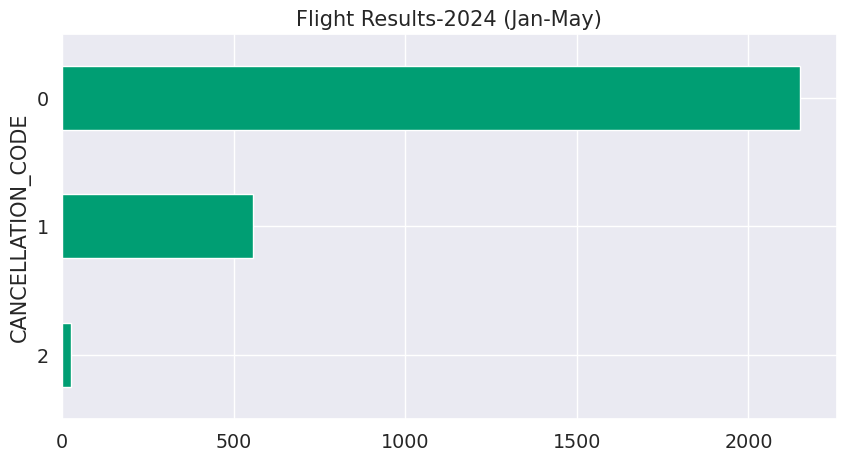

In [83]:
flight_data["CANCELLATION_CODE"].value_counts(ascending=True).plot(
    kind="barh", figsize=(10, 5), color=pal[1], title="Flight Results-2024 (Jan-May)"
)
plt.show()

In [98]:
df_del_canc = df
# calculate the mean of each column
#mean = df_del_canc['CANCELLED'].mean()

# fill NaN values with the mean of each column
#df_del_canc['CANCELLED'].fillna(mean, inplace=True)
#df_del_canc = df_del_canc.fillna(0)
#df_del_canc.head()

In [99]:
df_del_canc["DelayGroup"] = None
df_del_canc.loc[df_del_canc["ARR_DELAY"] == 0, "DelayGroup"] = "OnTime_Early"
df_del_canc.loc[(df_del_canc["ARR_DELAY"] > 0) & (df_del_canc["ARR_DELAY"] <= 15), "DelayGroup"] = "Small_Delay"
df_del_canc.loc[(df_del_canc["ARR_DELAY"] > 15) & (df_del_canc["ARR_DELAY"] <= 45), "DelayGroup"] = "Medium_Delay"
df_del_canc.loc[df_del_canc["ARR_DELAY"] > 45, "DelayGroup"] = "Large_Delay"
df_del_canc.loc[df_del_canc["CANCELLED"], "DelayGroup"] = "Cancelled"

How Many Flights Per Month?

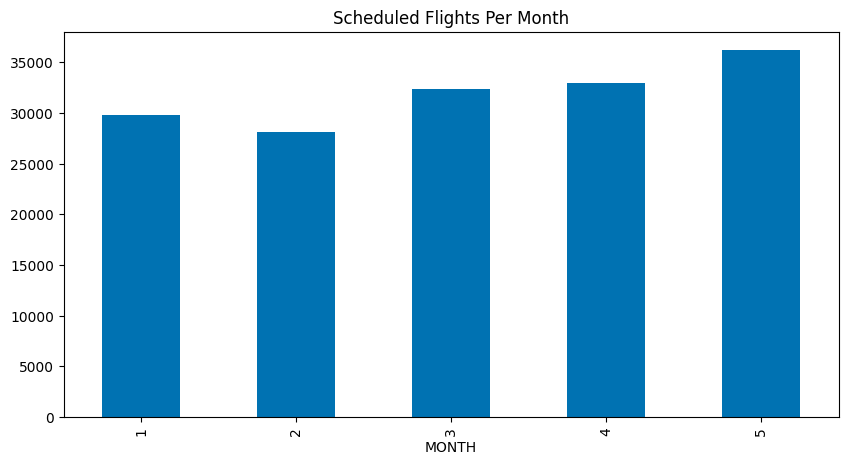

In [86]:
flight_data["MONTH"] = flight_data['DepDate'].dt.month
flight_data["MONTH"].value_counts().sort_index().plot(
    kind="bar", figsize=(10, 5), title="Scheduled Flights Per Month"
)
plt.show()

% of Flight results per Month

In [100]:
#df["YEAR"] = df["FL_DATE"].dt.year
df_agg = df_del_canc.groupby("MONTH")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Greens")

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
MONTH,,,,,
1,4.130262,41.426176,29.097167,25.328744,0.017651
2,5.672793,51.497617,26.911731,15.917858,nan
3,5.701235,48.164439,27.837929,18.296397,nan
4,5.721738,50.509414,28.233760,15.535088,nan
5,5.076622,48.432869,29.879548,16.610960,nan


In [88]:
delay_org_df = df[['ORIGIN', 'CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']]

In [89]:
count_delay_org_df = delay_org_df.groupby(['ORIGIN']).size().reset_index()
count_delay_org_df.rename(columns = {0:'Delay_Incidents'}, inplace = True)
count_delay_org_df.sort_values(by='Delay_Incidents', ascending=False, inplace = True)
count_delay_org_df = count_delay_org_df[0:15]

fig = px.bar(count_delay_org_df, x='ORIGIN', y='Delay_Incidents', title='Delay Incidents By Origin')
fig.update_layout(xaxis_tickfont_size=16, yaxis_tickfont_size=14)
fig.show()

In [94]:
delay_org_airline_df = df[['OP_UNIQUE_CARRIER', 'CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']]

In [96]:
count_delay_org_airline_df = delay_org_airline_df.groupby(['OP_UNIQUE_CARRIER']).size().reset_index()
count_delay_org_airline_df.rename(columns = {0:'Delay_Incidents'}, inplace = True)
count_delay_org_airline_df.sort_values(by='Delay_Incidents', ascending=False, inplace = True)
count_delay_org_airline_df = count_delay_org_airline_df[0:15]

fig = px.bar(count_delay_org_airline_df, x='OP_UNIQUE_CARRIER', y='Delay_Incidents', title='Delay Incidents By Airline')
fig.update_layout(xaxis_tickfont_size=16, yaxis_tickfont_size=14)
fig.show()
print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','XE: ExpressJet','CO: Continental Airlines','US: US Airways',
       'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines','FL: AirTran Airways','YV: Mesa Airlines',
       'B6: JetBlue Airways','OH: Comair','9E: Pinnacle Airlines','AS: Alaska Airlines','F9: Frontier Airlines',
       'HA: Hawaiian Airlines','AQ: Aloha Airlines'])

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines', 'US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines', 'AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines']


In [10]:
#Seperate Numerical data
flight_data_numerical = flight_data.select_dtypes(include = 'number')
flight_data_numerical.head()

,QUARTER,MONTH,DAY_OF_WEEK,MKT_CARRIER_FL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,TAXI_OUT,TAXI_IN,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,AIR_TIME,FLIGHTS,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,Status
0,1,1,1,1471,1471,14747,13303,2234,0.0,0.0,13.0,12.0,-8.0,0.0,0.0,310.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1,1,1,1667,1667,14747,11298,718,0.0,0.0,15.0,12.0,-8.0,0.0,0.0,202.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,1,1,1,1819,1819,14747,13303,1229,0.0,0.0,20.0,16.0,2.0,2.0,0.0,312.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,1,1,1,1992,1992,14747,11298,1346,0.0,0.0,27.0,11.0,6.0,6.0,0.0,205.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,1,1,1,2001,2001,14747,14100,2301,0.0,0.0,14.0,5.0,-12.0,0.0,0.0,279.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [85]:
flight_data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159392 entries, 0 to 159391
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   QUARTER              159392 non-null  int64  
 1   MONTH                159392 non-null  int64  
 2   DAY_OF_WEEK          159392 non-null  int64  
 3   MKT_CARRIER_FL_NUM   159392 non-null  int64  
 4   OP_CARRIER_FL_NUM    159392 non-null  int64  
 5   ORIGIN_AIRPORT_ID    159392 non-null  int64  
 6   DEST_AIRPORT_ID      159392 non-null  int64  
 7   CRS_DEP_TIME         159392 non-null  int64  
 8   DEP_DELAY_NEW        156726 non-null  float64
 9   DEP_DEL15            156726 non-null  float64
 10  TAXI_OUT             156686 non-null  float64
 11  TAXI_IN              156627 non-null  float64
 12  ARR_DELAY            156321 non-null  float64
 13  ARR_DELAY_NEW        156321 non-null  float64
 14  ARR_DEL15            156321 non-null  float64
 15  AIR_TIME         

In [86]:
flight_data_numerical.shape

(159392, 24)

In [11]:
flight_df = flight_data_numerical.corr()

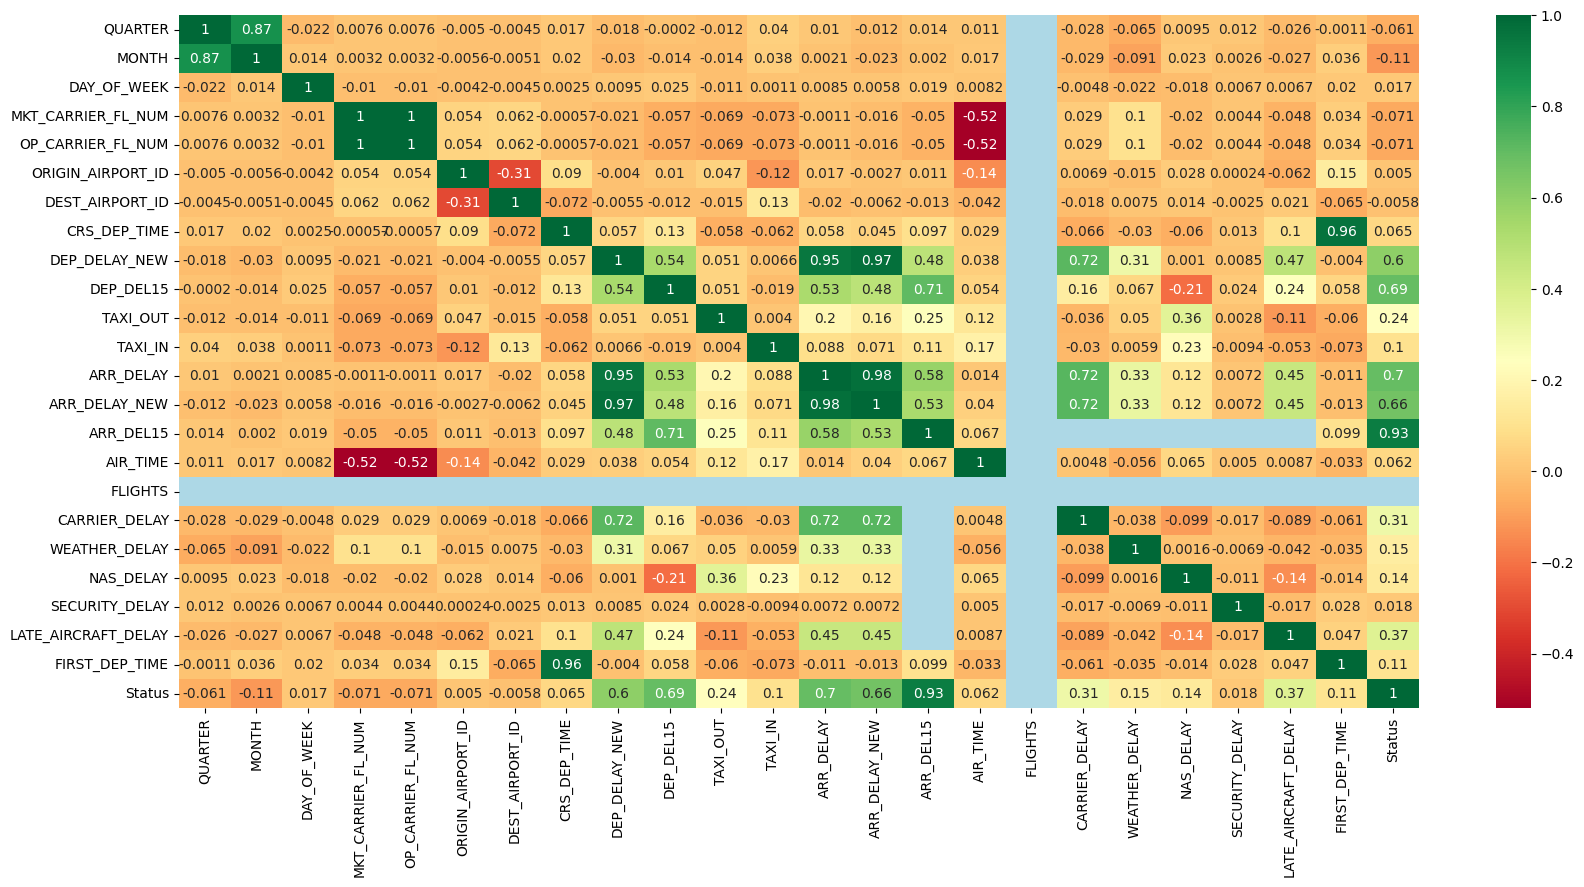

In [12]:
f, ax = plt.subplots(figsize=(20, 9))
color = plt.get_cmap('RdYlGn')   # default color
color.set_bad('lightblue')    # if the value is bad the color would be lightblue instead of white
h_map = sns.heatmap(data=flight_df, annot=True, cmap=color)   # now plot the heatmap

#sns.heatmap(flight_df, vmax=.8, square=True);
#sns.heatmap(flight_data.corr(), annot=True , cmap='crest')
plt.show()

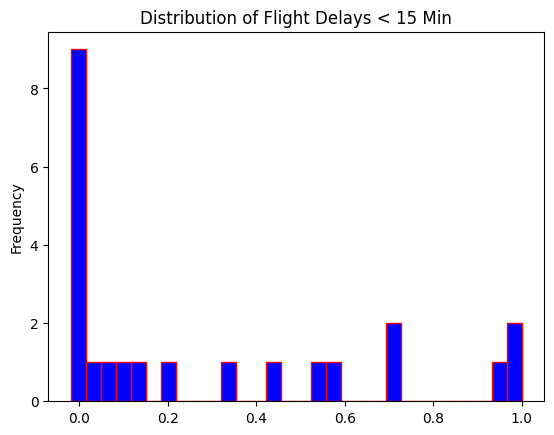

In [69]:
flight_df.query("ARR_DELAY <= 15")["ARR_DELAY"].plot(
    kind="hist", bins=30, title="Distribution of Flight Delays < 15 Min", color = "blue", ec="red"
)
plt.show()

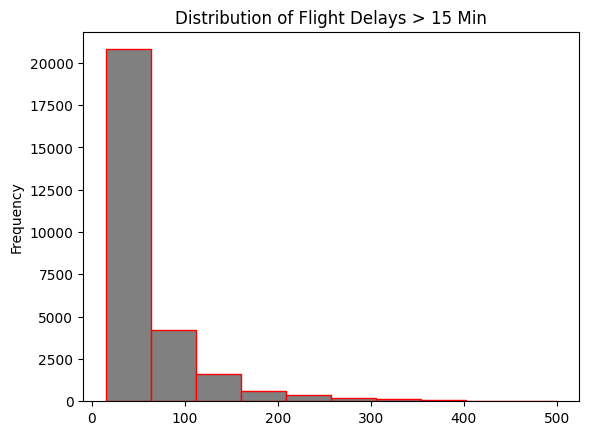

In [70]:
df_delay_ab15 = df.query("ARR_DELAY > 15")["ARR_DELAY"]
df_delay_ab15.plot(
    kind="hist", bins=10, range=[15,500], title="Distribution of Flight Delays > 15 Min", histtype='barstacked', color = "grey", ec="red"
)
plt.show()

Text(0.5, 0, 'Flights (100k)')

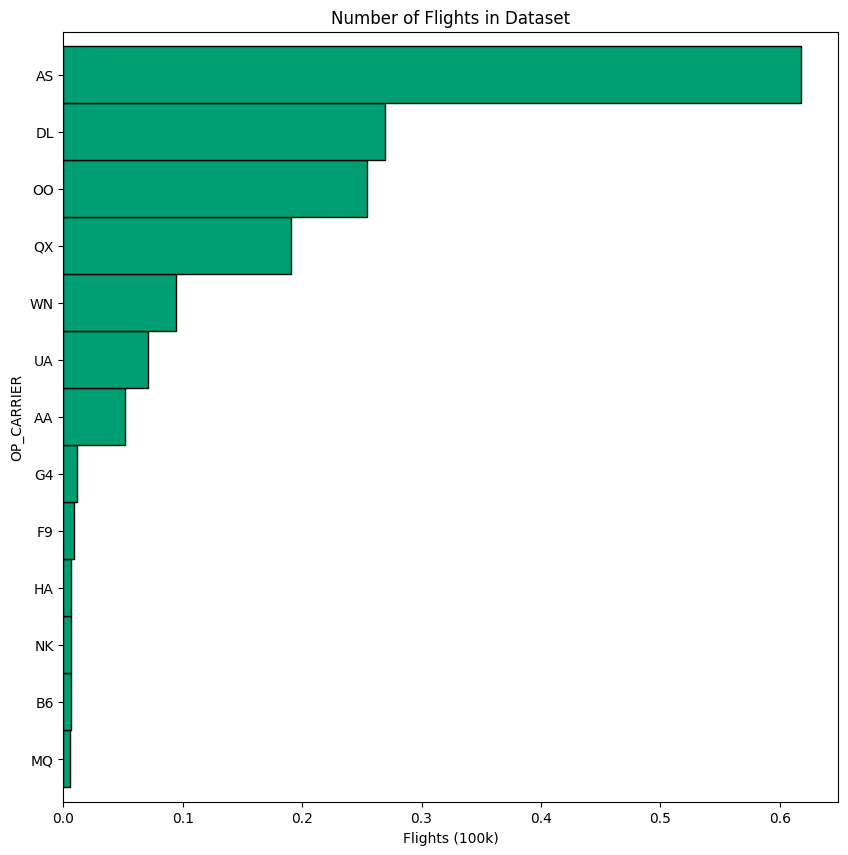

In [71]:
fig, ax = plt.subplots(figsize=(10, 10))
airlines_ordered = (df["OP_CARRIER"].value_counts(ascending=True) / 100_000).plot(
    kind="barh", ax=ax, color=pal[1], width=1, edgecolor="black"
)
ax.set_title("Number of Flights in Dataset")
ax.set_xlabel("Flights (100k)")

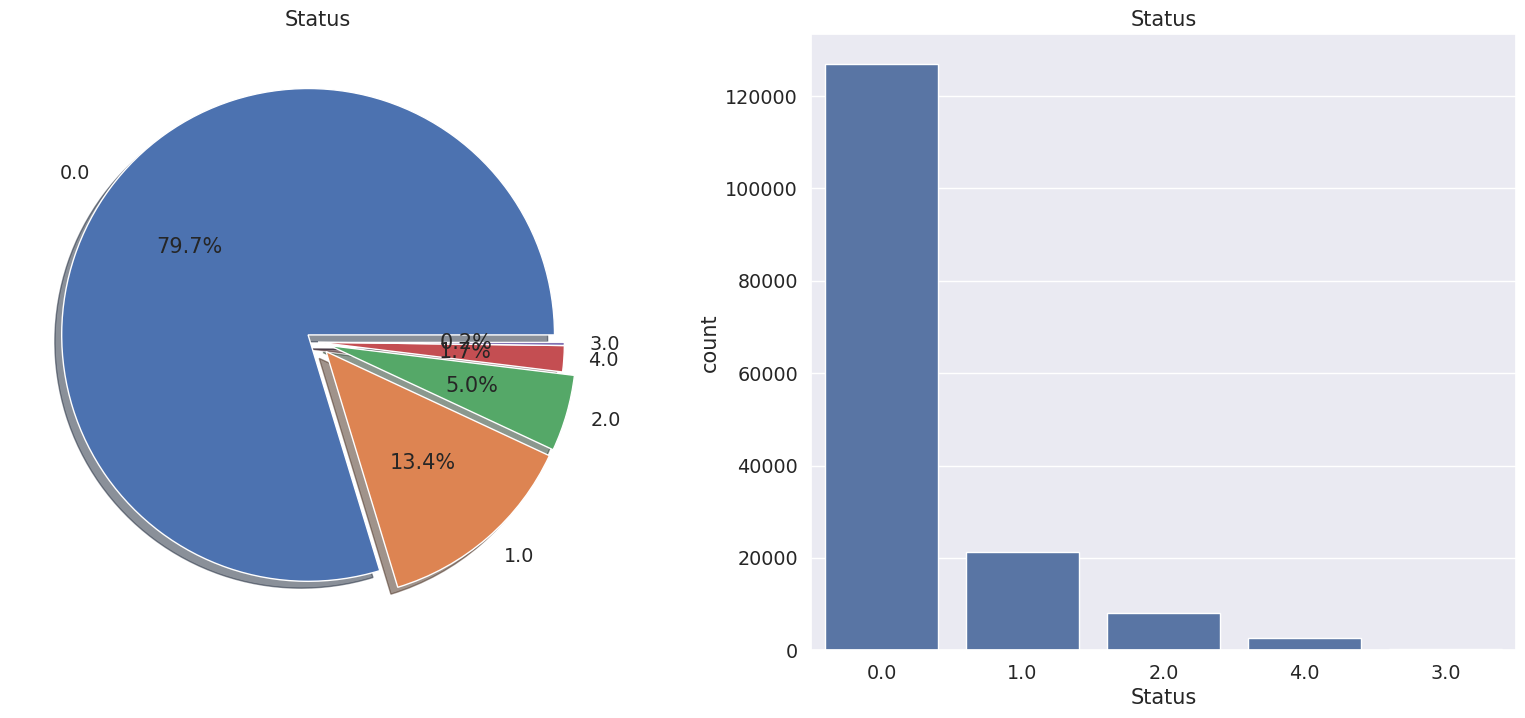

Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)


In [92]:
f,ax=plt.subplots(1,2,figsize=(20,8))
flight_data['Status'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot(x='Status',order = flight_data['Status'].value_counts().index, data=flight_data,ax=ax[1])
#sns.countplot("Status", hue = "Status", data = flight_data, ax = ax[1])
ax[1].set_title('Status')
plt.show()

print('Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)')

In [93]:
#Delayed Flights
Delayedflights = flight_data[(flight_data.Status >= 1) &(flight_data.Status < 3)]

In [94]:
#skewness and kurtosis
print("Skewness: %f" % Delayedflights['ARR_DELAY'].skew())
print("Kurtosis: %f" % Delayedflights['ARR_DELAY'].kurt())

Skewness: 9.462295
Kurtosis: 185.247891


<ipython-input-95-e5b4fd118978>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Delayedflights['ARR_DELAY'])


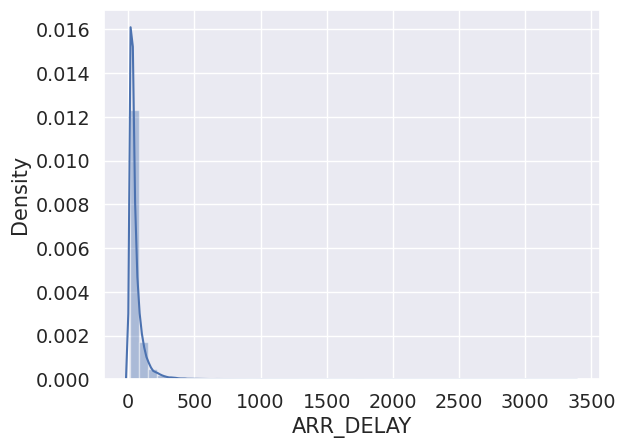

In [95]:
#histogram
sns.distplot(Delayedflights['ARR_DELAY'])
plt.show()

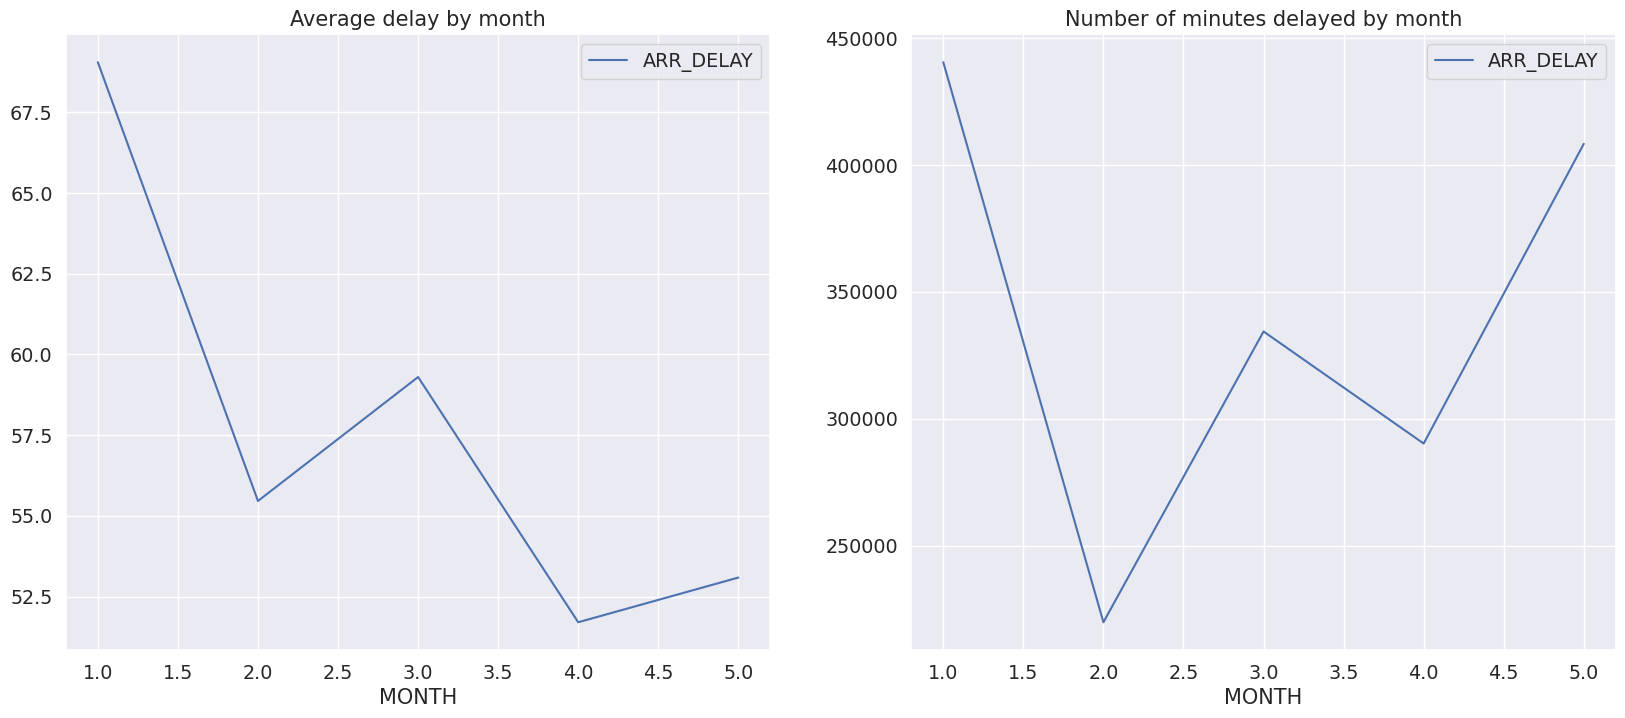

In [96]:
f,ax=plt.subplots(1,2,figsize=(20,8))
Delayedflights[['MONTH','ARR_DELAY']].groupby(['MONTH']).mean().plot(ax=ax[0])
ax[0].set_title('Average delay by month')
Delayedflights[['MONTH','ARR_DELAY']].groupby(['MONTH']).sum().plot(ax=ax[1])
ax[1].set_title('Number of minutes delayed by month')
plt.show()

In [97]:
Delayedflights = Delayedflights.fillna(0)
Delayedflights.head()

,QUARTER,MONTH,DAY_OF_WEEK,FL_DATE,MKT_CARRIER,MKT_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,TAXI_OUT,TAXI_IN,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,CANCELLATION_CODE,AIR_TIME,FLIGHTS,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,DepDate,Status
15,1,1,1,1/1/2024 12:00:00 AM,AA,2407,AA,AA,2407,14747,SEA,"Seattle, WA",WA,11057,CLT,"Charlotte, NC",NC,1348,0.0,0.0,12.0,26.0,15.0,15.0,1.0,0,277.0,1.0,0.0,0.0,15.0,0.0,0.0,0.0,2024-01-01,1.0
27,1,1,1,1/1/2024 12:00:00 AM,AA,339,AA,AA,339,14107,PHX,"Phoenix, AZ",AZ,11884,GEG,"Spokane, WA",WA,2128,0.0,0.0,13.0,42.0,32.0,32.0,1.0,0,143.0,1.0,0.0,0.0,32.0,0.0,0.0,0.0,2024-01-01,1.0
35,1,1,1,1/1/2024 12:00:00 AM,AA,506,AA,AA,506,11057,CLT,"Charlotte, NC",NC,14747,SEA,"Seattle, WA",WA,1500,64.0,1.0,15.0,12.0,36.0,36.0,1.0,0,307.0,1.0,1.0,0.0,0.0,0.0,35.0,0.0,2024-01-01,1.0
38,1,1,1,1/1/2024 12:00:00 AM,AA,583,AA,AA,583,14747,SEA,"Seattle, WA",WA,11298,DFW,"Dallas/Fort Worth, TX",TX,1056,20.0,1.0,16.0,14.0,18.0,18.0,1.0,0,199.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,2024-01-01,1.0
44,1,1,1,1/1/2024 12:00:00 AM,AS,1004,AS,AS,1004,14747,SEA,"Seattle, WA",WA,11884,GEG,"Spokane, WA",WA,1950,17.0,1.0,17.0,10.0,20.0,20.0,1.0,0,45.0,1.0,0.0,0.0,3.0,0.0,17.0,0.0,2024-01-01,1.0


In [98]:
Delayedflights = Delayedflights[['MONTH','ARR_DELAY', 'Status','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','TAXI_OUT','TAXI_IN','AIR_TIME','CRS_DEP_TIME' ]]
Delayedflights.head()

,MONTH,ARR_DELAY,Status,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,TAXI_OUT,TAXI_IN,AIR_TIME,CRS_DEP_TIME
15,1,15.0,1.0,0.0,0.0,15.0,0.0,0.0,12.0,26.0,277.0,1348
27,1,32.0,1.0,0.0,0.0,32.0,0.0,0.0,13.0,42.0,143.0,2128
35,1,36.0,1.0,1.0,0.0,0.0,0.0,35.0,15.0,12.0,307.0,1500
38,1,18.0,1.0,18.0,0.0,0.0,0.0,0.0,16.0,14.0,199.0,1056
44,1,20.0,1.0,0.0,0.0,3.0,0.0,17.0,17.0,10.0,45.0,1950


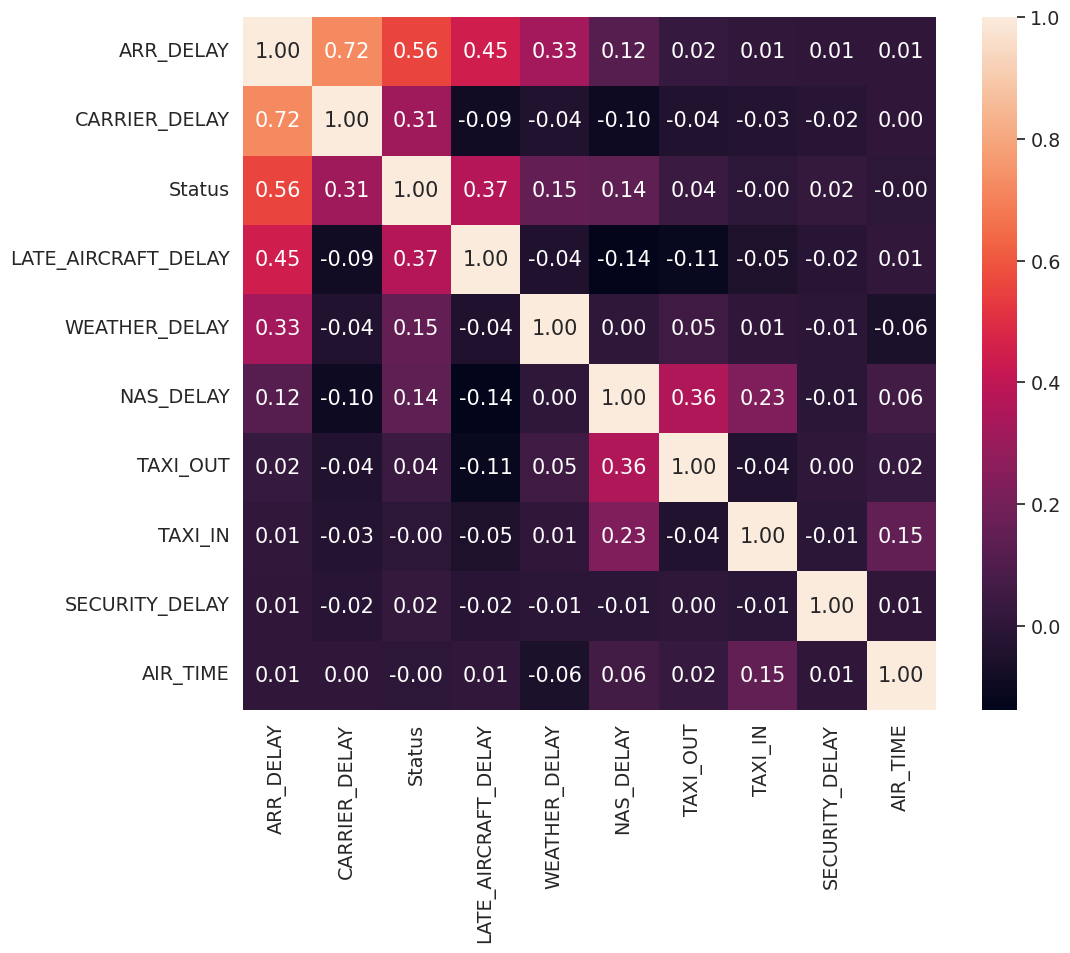

In [99]:
delcorrmat = Delayedflights.corr()

k = 10 #number of variables for heatmap
f, ax = plt.subplots(figsize=(12, 9))
cols = delcorrmat.nlargest(k, 'ARR_DELAY')['ARR_DELAY'].index
cm = np.corrcoef(Delayedflights[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


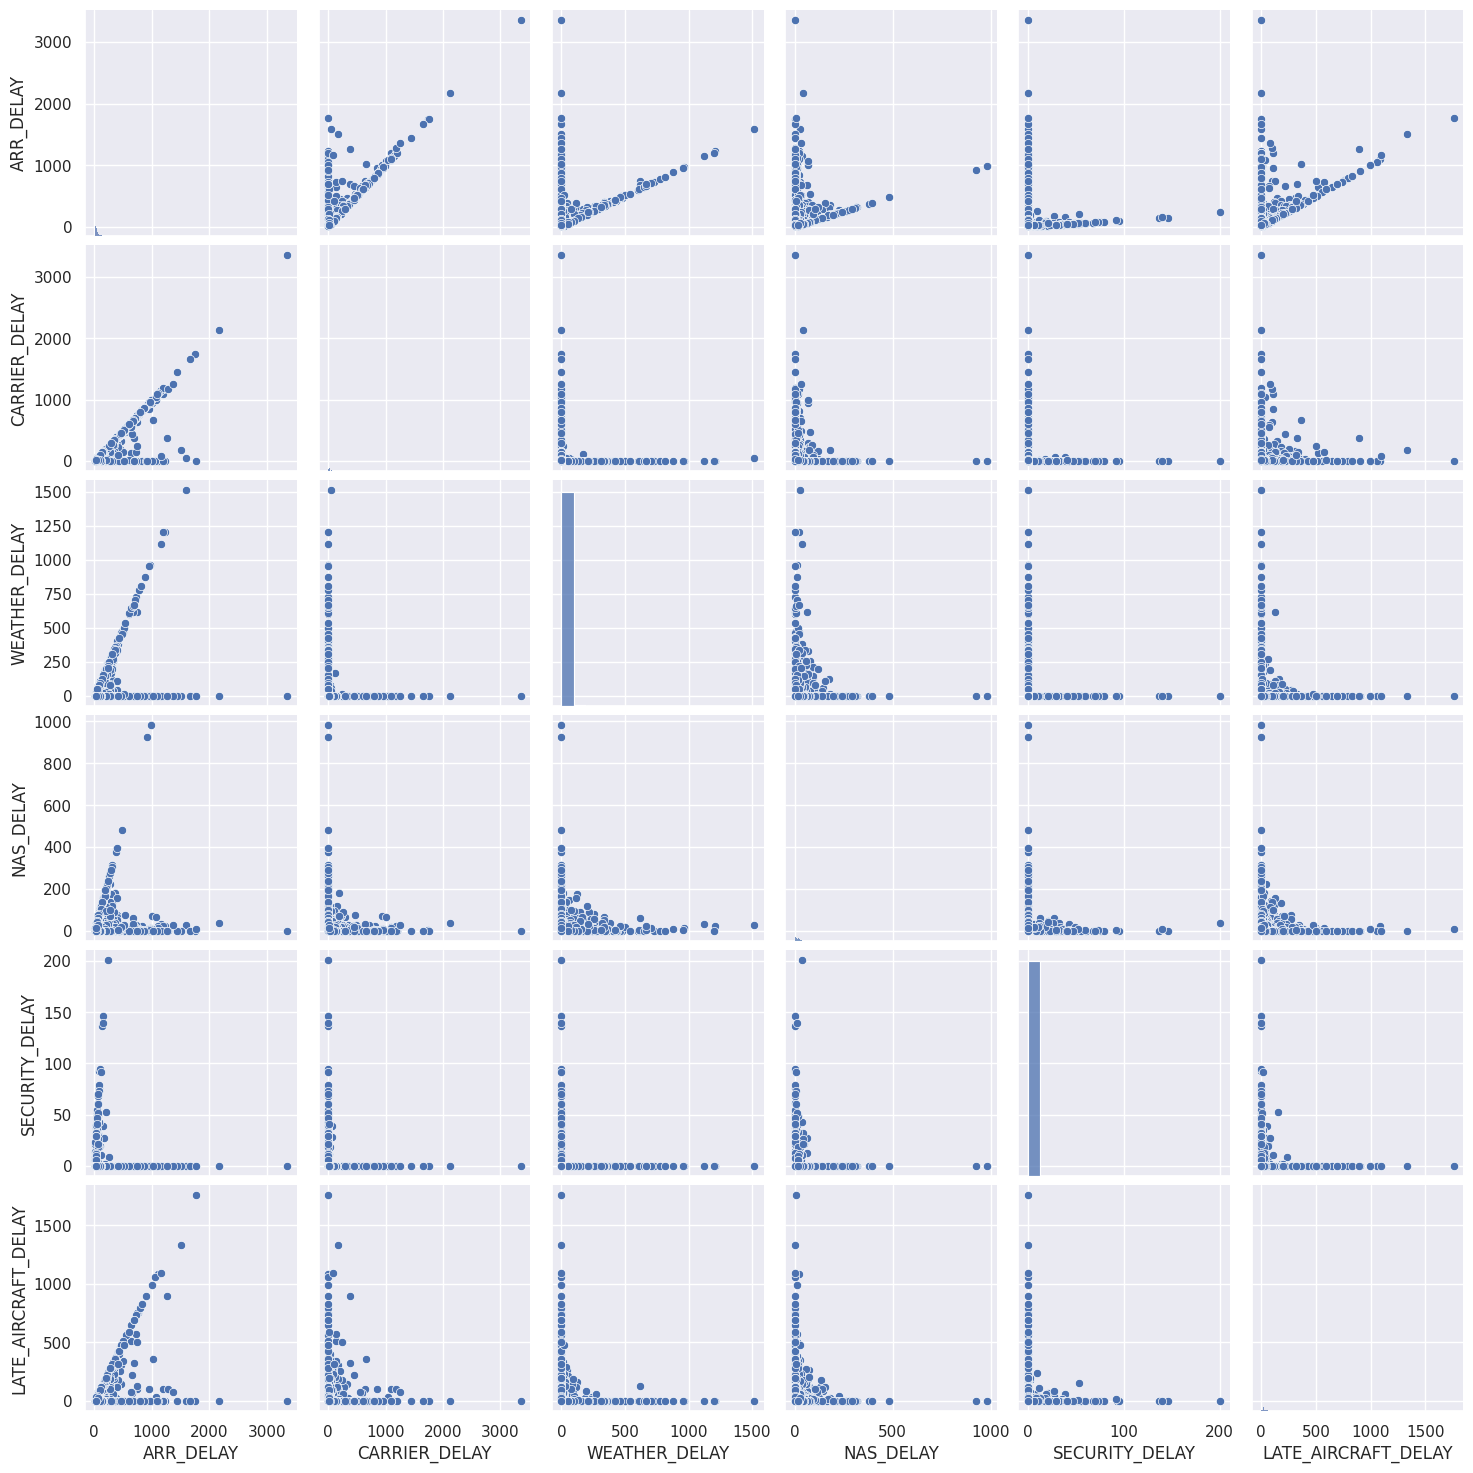

In [112]:
#scatterplot
sns.set()
cols = ['ARR_DELAY','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']
sns.pairplot(Delayedflights[cols], size = 2.5)
plt.show()

In [134]:
print(df['OP_UNIQUE_CARRIER'].value_counts())

OP_UNIQUE_CARRIER
AS    61824
DL    26977
OO    25424
QX    19098
WN     9444
UA     7117
AA     5142
G4     1134
F9      888
HA      613
B6      608
NK      608
MQ      515
Name: count, dtype: int64


<ipython-input-142-baa487727e3e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'OP_UNIQUE_CARRIER', y = 'CARRIER_DELAY', data = df, palette='Set2')


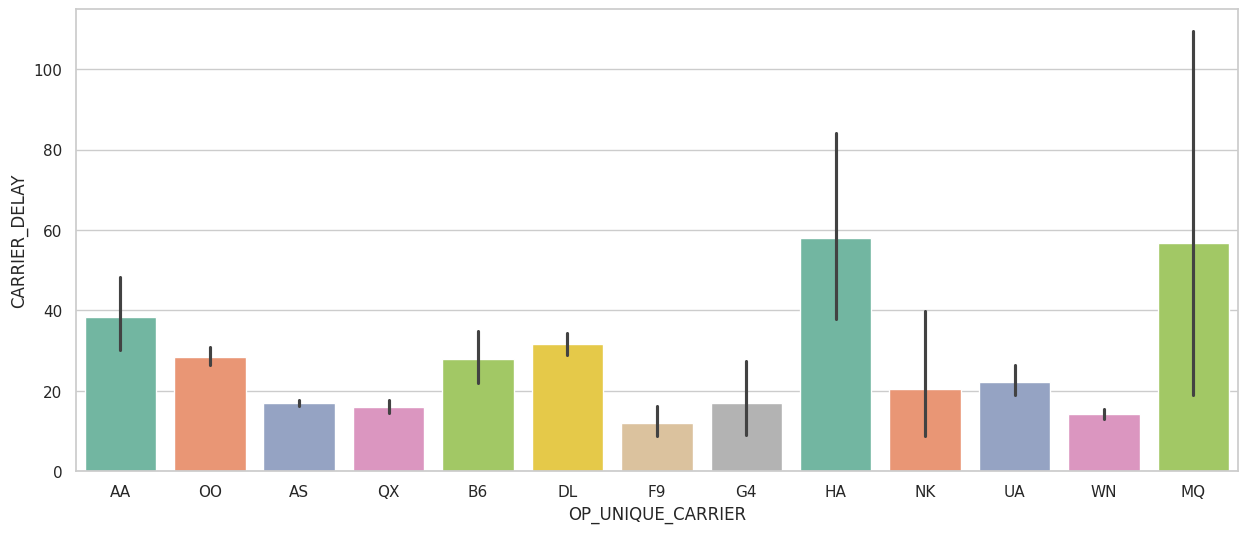

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines', 'US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines', 'AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines']


In [142]:
# Create a Seaborn barplot with a color palette
plt.figure(figsize=(15, 6))

sns.barplot(x = 'OP_UNIQUE_CARRIER', y = 'CARRIER_DELAY', data = df, palette='Set2')

# Show the plot
plt.show()
print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','XE: ExpressJet','CO: Continental Airlines','US: US Airways',
       'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines','FL: AirTran Airways','YV: Mesa Airlines',
       'B6: JetBlue Airways','OH: Comair','9E: Pinnacle Airlines','AS: Alaska Airlines','F9: Frontier Airlines',
       'HA: Hawaiian Airlines','AQ: Aloha Airlines'])

<ipython-input-137-8454815a4d0c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'OP_UNIQUE_CARRIER', y = 'CARRIER_DELAY', data = df, palette='Set2')


<Axes: xlabel='OP_UNIQUE_CARRIER', ylabel='CARRIER_DELAY'>

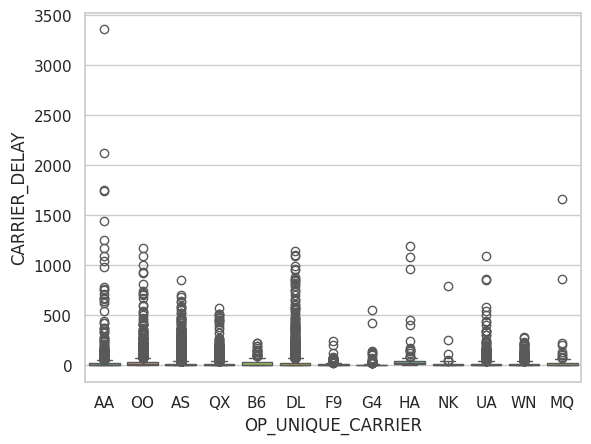

In [137]:
#df.boxplot(by ='OP_UNIQUE_CARRIER', column =['CARRIER_DELAY'], grid = False)
# Draw a vertical boxplot grouped
# by a categorical variable:
sns.set_style("whitegrid")
sns.boxplot(x = 'OP_UNIQUE_CARRIER', y = 'CARRIER_DELAY', data = df, palette='Set2')

In [116]:
dfm_item_sales = df.groupby(['OP_UNIQUE_CARRIER' , 'CARRIER_DELAY'])['ARR_DELAY'].mean().unstack()
dfm_item_sales.head()

CARRIER_DELAY,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0,130.0,131.0,132.0,133.0,134.0,135.0,136.0,137.0,138.0,139.0,140.0,141.0,142.0,143.0,144.0,145.0,146.0,147.0,148.0,149.0,150.0,151.0,152.0,153.0,154.0,155.0,156.0,157.0,158.0,159.0,160.0,161.0,162.0,163.0,164.0,165.0,166.0,167.0,168.0,169.0,170.0,171.0,172.0,173.0,174.0,175.0,176.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0,184.0,185.0,186.0,187.0,188.0,189.0,190.0,191.0,192.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0,200.0,201.0,202.0,204.0,205.0,206.0,207.0,208.0,209.0,210.0,211.0,212.0,213.0,214.0,215.0,216.0,217.0,218.0,219.0,220.0,221.0,222.0,223.0,224.0,225.0,226.0,227.0,228.0,229.0,230.0,231.0,232.0,233.0,234.0,235.0,236.0,237.0,238.0,239.0,240.0,241.0,242.0,243.0,244.0,245.0,246.0,247.0,249.0,251.0,253.0,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0,270.0,272.0,273.0,274.0,277.0,278.0,279.0,282.0,283.0,284.0,287.0,288.0,293.0,294.0,296.0,301.0,302.0,304.0,305.0,312.0,314.0,315.0,318.0,319.0,320.0,321.0,322.0,325.0,326.0,330.0,332.0,333.0,334.0,336.0,337.0,338.0,339.0,340.0,341.0,343.0,346.0,349.0,351.0,352.0,355.0,357.0,358.0,359.0,361.0,362.0,363.0,364.0,365.0,371.0,372.0,373.0,374.0,375.0,377.0,378.0,383.0,386.0,389.0,394.0,402.0,403.0,405.0,406.0,407.0,408.0,409.0,410.0,413.0,415.0,416.0,420.0,421.0,423.0,426.0,428.0,430.0,431.0,432.0,437.0,442.0,443.0,447.0,449.0,452.0,453.0,454.0,458.0,464.0,465.0,470.0,471.0,473.0,475.0,476.0,478.0,479.0,483.0,486.0,505.0,508.0,510.0,512.0,516.0,521.0,524.0,532.0,534.0,540.0,541.0,547.0,552.0,554.0,558.0,560.0,571.0,574.0,575.0,577.0,584.0,586.0,589.0,590.0,593.0,608.0,609.0,614.0,623.0,637.0,640.0,645.0,647.0,659.0,666.0,667.0,674.0,675.0,678.0,684.0,703.0,707.0,712.0,717.0,727.0,736.0,745.0,750.0,755.0,756.0,764.0,780.0,794.0,799.0,813.0,814.0,822.0,845.0,852.0,854.0,859.0,865.0,867.0,869.0,884.0,928.0,938.0,952.0,961.0,962.0,989.0,992.0,1001.0,1049.0,1084.0,1090.0,1094.0,1095.0,1097.0,1102.0,1146.0,1174.0,1176.0,1193.0,1259.0,1443.0,1662.0,1746.0,1751.0,2128.0,3359.0
OP_UNIQUE_CARRIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AA,77.880342,48.279070,89.272727,48.771429,85.771429,51.657143,47.148148,54.535714,64.437500,61.200000,51.823529,54.909091,42.529412,49.954545,33.666667,38.318182,30.518519,48.789474,35.384615,34.400000,63.166667,70.866667,36.214286,35.333333,40.777778,52.888889,45.461538,31.300000,50.750000,56.230769,38.666667,34.888889,77.500000,71.750000,38.166667,62.600000,70.333333,NaN,56.250000,85.250000,40.000000,55.500000,70.428571,78.250000,116.666667,45.000000,133.00,69.00000,49.000000,55.857143,78.250000,52.000000,438.000000,73.000,54.000000,NaN,78.800000,76.500000,87.200000,59.000000,60.000000,61.000000,110.000000,65.000000,NaN,125.000,66.000000,99.000000,95.333333,69.000000,NaN,87.000000,94.000000,NaN,74.000000,439.333333,76.000000,87.000000,80.500000,NaN,80.000000,NaN,154.000000,169.333333,NaN,85.000000,136.2,92.000000,143.000000,NaN,160

<Axes: xlabel='OP_UNIQUE_CARRIER'>

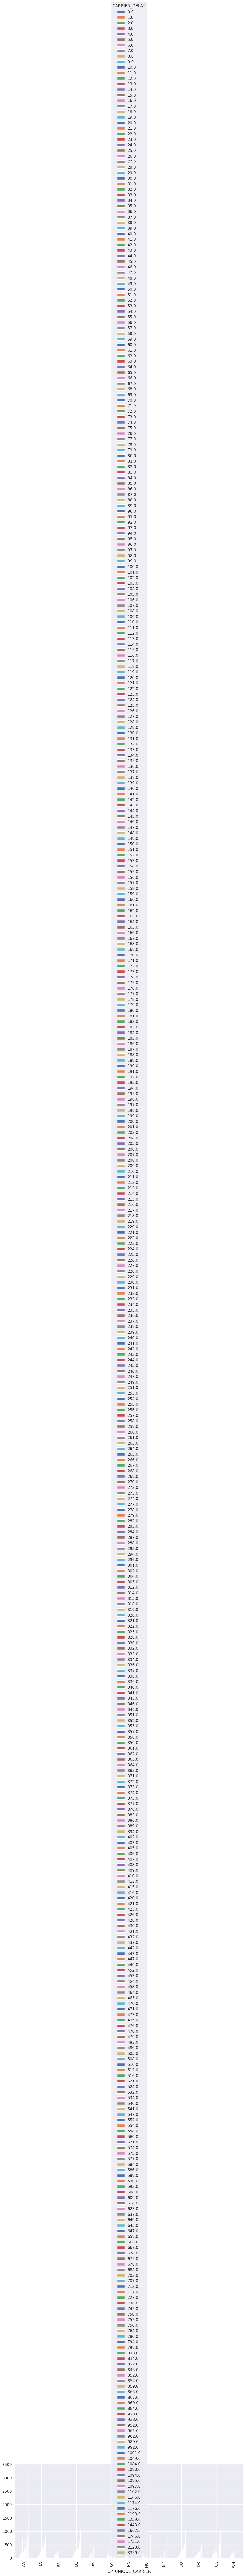

In [117]:
dfm_item_sales.plot.bar(figsize = (12,5))

In [144]:
print(df['ORIGIN'].value_counts())

ORIGIN
SEA    70643
GEG     8137
PHX     3873
LAS     3701
PDX     3658
       ...  
RSW      119
MRY       73
JAC       53
HDN       41
SIT       31
Name: count, Length: 97, dtype: int64


In [24]:
df_airport_5000 = df.groupby('ORIGIN').filter(lambda x : len(x)>3500)
#df_airport_5000 = df['ORIGIN'][1]
df_airport_5000.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93574 entries, 0 to 159390
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           93574 non-null  int64  
 1   YEAR                 93574 non-null  int64  
 2   QUARTER              93574 non-null  int64  
 3   MONTH                93574 non-null  int64  
 4   DAY_OF_MONTH         93574 non-null  int64  
 5   DAY_OF_WEEK          93574 non-null  int64  
 6   FL_DATE              93574 non-null  object 
 7   MKT_CARRIER          93574 non-null  object 
 8   MKT_CARRIER_FL_NUM   93574 non-null  int64  
 9   OP_UNIQUE_CARRIER    93574 non-null  object 
 10  OP_CARRIER           93574 non-null  object 
 11  TAIL_NUM             93463 non-null  object 
 12  OP_CARRIER_FL_NUM    93574 non-null  int64  
 13  ORIGIN_AIRPORT_ID    93574 non-null  int64  
 14  ORIGIN               93574 non-null  object 
 15  ORIGIN_CITY_NAME     93574 non-null  obj

<ipython-input-25-64d0cbafc5ab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_airport_5000['ORIGIN'], y = 'LATE_AIRCRAFT_DELAY', data = df, palette='Set2')


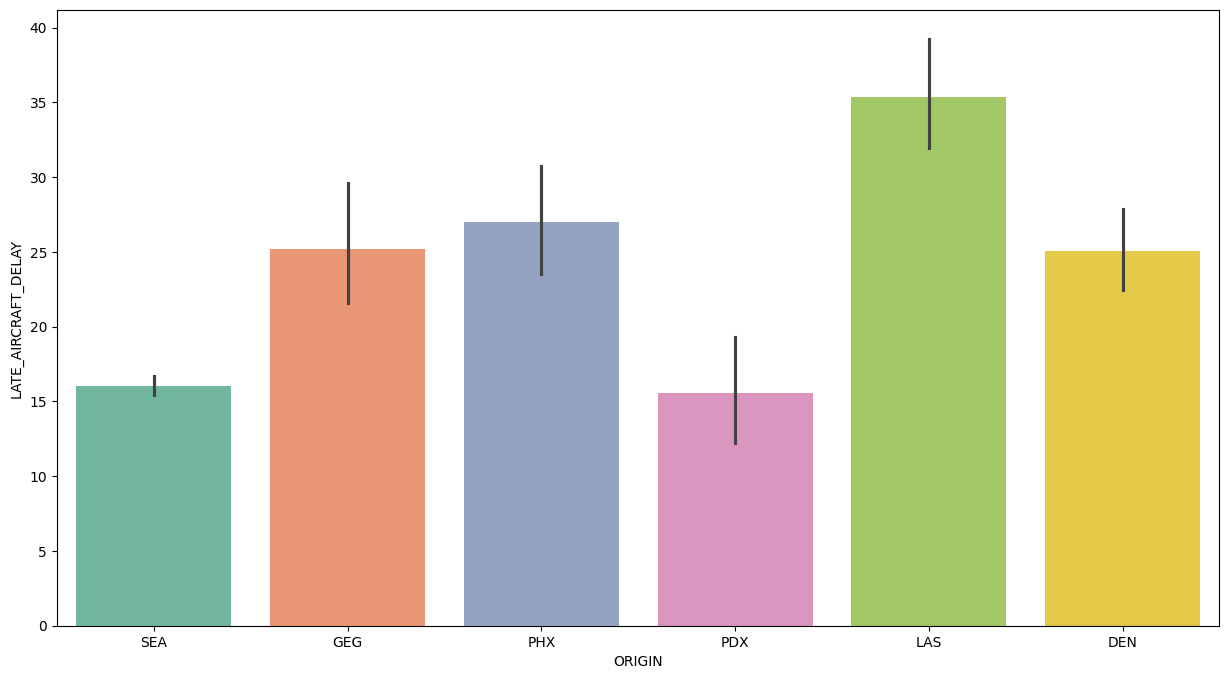

In [25]:
# Create a Seaborn barplot with a color palette
plt.figure(figsize=(15, 8))

sns.barplot(x = df_airport_5000['ORIGIN'], y = 'LATE_AIRCRAFT_DELAY', data = df, palette='Set2')

# Show the plot
plt.show()

<ipython-input-27-daa5dfef4434>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df_airport_5000['ORIGIN'], y = 'LATE_AIRCRAFT_DELAY', data = df, palette='Set2')


<Axes: xlabel='ORIGIN', ylabel='LATE_AIRCRAFT_DELAY'>

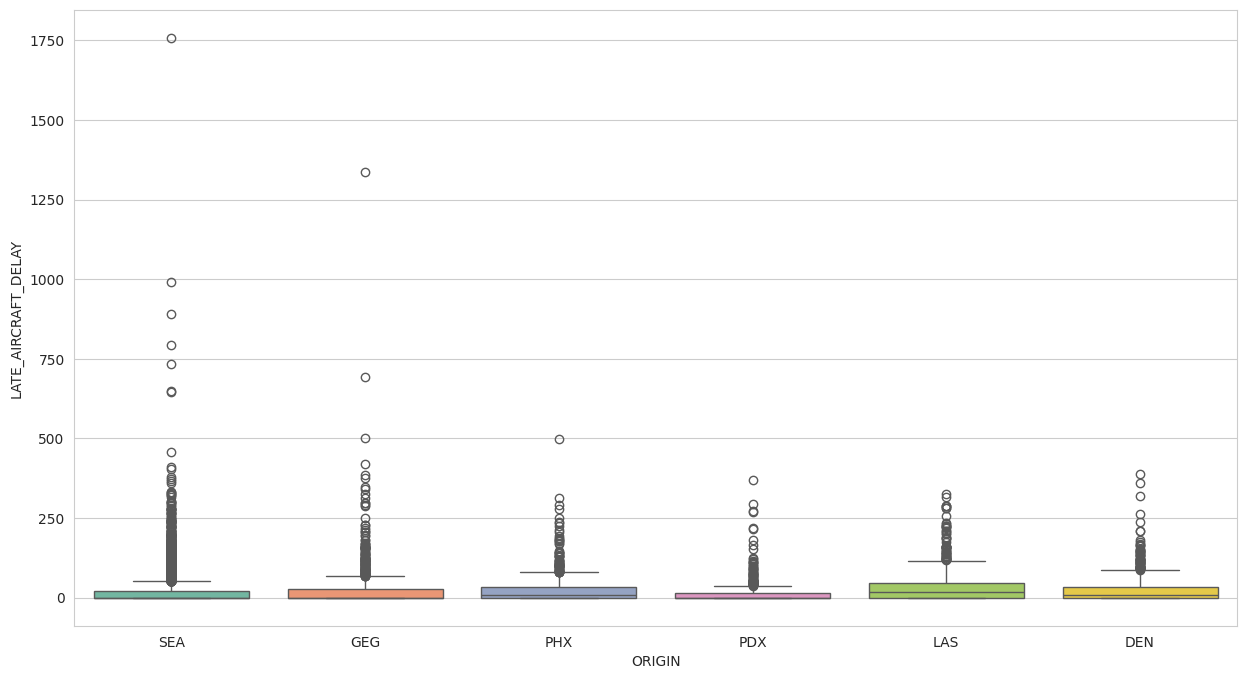

In [27]:
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")
sns.boxplot(x = df_airport_5000['ORIGIN'], y = 'LATE_AIRCRAFT_DELAY', data = df, palette='Set2')

In [5]:
df['OP_CARRIER_FL_NUM'].value_counts()

,count
OP_CARRIER_FL_NUM,
2003,498
2001,481
305,456
326,348
304,340
...,...
1211,1
2743,1
2727,1


In [8]:
flight_data['DepDate'].value_counts()


,count
DepDate,
2024-05-23,1252
2024-05-31,1251
2024-05-24,1251
2024-05-30,1251
2024-05-27,1246
...,...
2024-01-27,807
2024-01-13,805
2024-01-20,803


In [14]:
flight_data.head()

,QUARTER,MONTH,DAY_OF_WEEK,FL_DATE,MKT_CARRIER,MKT_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,TAXI_OUT,TAXI_IN,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,CANCELLATION_CODE,AIR_TIME,FLIGHTS,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,DepDate,Status
0,1,1,1,1/1/2024 12:00:00 AM,AA,1471,AA,AA,1471,14747,SEA,"Seattle, WA",WA,13303,MIA,"Miami, FL",FL,2234,0.0,0.0,13.0,12.0,-8.0,0.0,0.0,NaN,310.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01,0.0
1,1,1,1,1/1/2024 12:00:00 AM,AA,1667,AA,AA,1667,14747,SEA,"Seattle, WA",WA,11298,DFW,"Dallas/Fort Worth, TX",TX,718,0.0,0.0,15.0,12.0,-8.0,0.0,0.0,NaN,202.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01,0.0
2,1,1,1,1/1/2024 12:00:00 AM,AA,1819,AA,AA,1819,14747,SEA,"Seattle, WA",WA,13303,MIA,"Miami, FL",FL,1229,0.0,0.0,20.0,16.0,2.0,2.0,0.0,NaN,312.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01,0.0
3,1,1,1,1/1/2024 12:00:00 AM,AA,1992,AA,AA,1992,14747,SEA,"Seattle, WA",WA,11298,DFW,"Dallas/Fort Worth, TX",TX,1346,0.0,0.0,27.0,11.0,6.0,6.0,0.0,NaN,205.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01,0.0
4,1,1,1,1/1/2024 12:00:00 AM,AA,2001,AA,AA,2001,14747,SEA,"Seattle, WA",WA,14100,PHL,"Philadelphia, PA",PA,2301,0.0,0.0,14.0,5.0,-12.0,0.0,0.0,NaN,279.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01,0.0


In [45]:
df_time = flight_data[['DepDate','AIR_TIME','FLIGHTS', 'ORIGIN_AIRPORT_ID', 'OP_CARRIER_FL_NUM']]
df_time.head()

,DepDate,AIR_TIME,FLIGHTS,ORIGIN_AIRPORT_ID,OP_CARRIER_FL_NUM
0,2024-01-01,310.0,1.0,14747,1471
1,2024-01-01,202.0,1.0,14747,1667
2,2024-01-01,312.0,1.0,14747,1819
3,2024-01-01,205.0,1.0,14747,1992
4,2024-01-01,279.0,1.0,14747,2001


In [46]:
# Set 'DepDate' as the index
df_time.set_index('DepDate', inplace=True)
df_time.head()

# Reset the index
#df_time.reset_index(inplace=True)

,AIR_TIME,FLIGHTS,ORIGIN_AIRPORT_ID,OP_CARRIER_FL_NUM
DepDate,,,,
2024-01-01,310.0,1.0,14747,1471
2024-01-01,202.0,1.0,14747,1667
2024-01-01,312.0,1.0,14747,1819
2024-01-01,205.0,1.0,14747,1992
2024-01-01,279.0,1.0,14747,2001


In [56]:
df_time['2024-01-01':'2024-01-31']

,AIR_TIME,FLIGHTS,ORIGIN_AIRPORT_ID,OP_CARRIER_FL_NUM
DepDate,,,,
2024-01-01,310.0,1.0,14747,1471
2024-01-01,202.0,1.0,14747,1667
2024-01-01,312.0,1.0,14747,1819
2024-01-01,205.0,1.0,14747,1992
2024-01-01,279.0,1.0,14747,2001
...,...,...,...,...
2024-01-31,117.0,1.0,12889,737
2024-01-31,140.0,1.0,10666,756
2024-01-31,137.0,1.0,14747,793


In [63]:
df_time['2024-01-01':'2024-01-31'].OP_CARRIER_FL_NUM.mean()

1682.6686040651773

In [62]:
df_time['OP_CARRIER_FL_NUM'].resample('M').mean().head()

,OP_CARRIER_FL_NUM
DepDate,
2024-01-31,1682.668604
2024-02-29,1700.268729
2024-03-31,1665.039036
2024-04-30,1715.847165
2024-05-31,1689.681514


<Axes: xlabel='DepDate'>

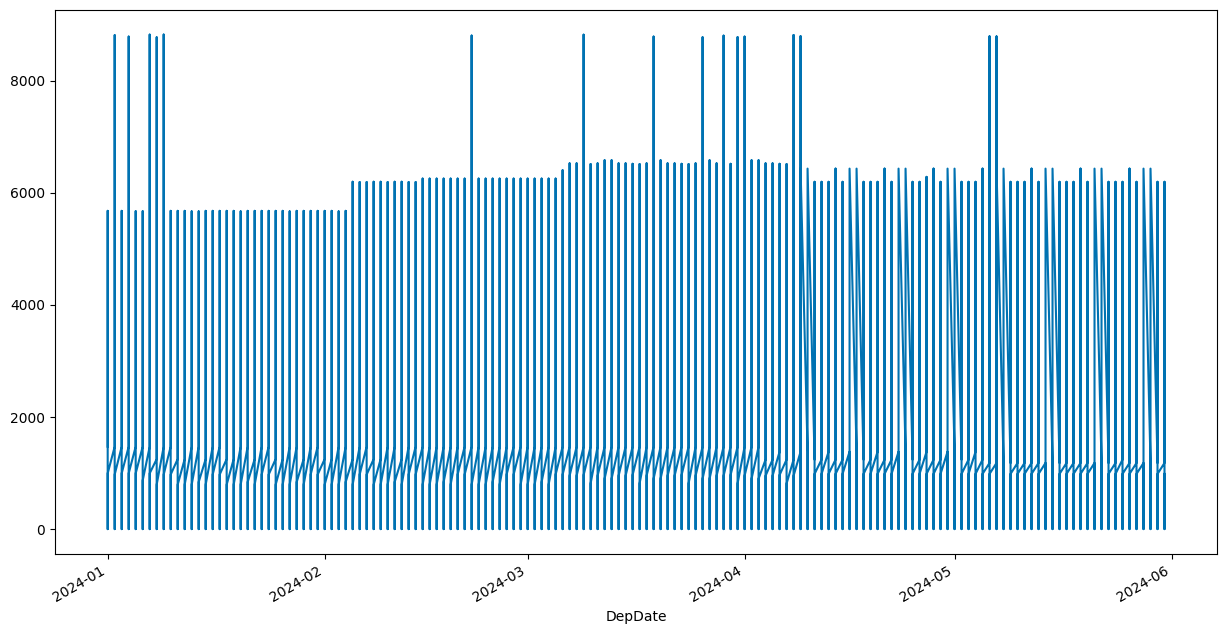

In [64]:
%matplotlib inline
plt.figure(figsize=(15, 8))
df_time['OP_CARRIER_FL_NUM'].plot()

<Axes: xlabel='DepDate'>

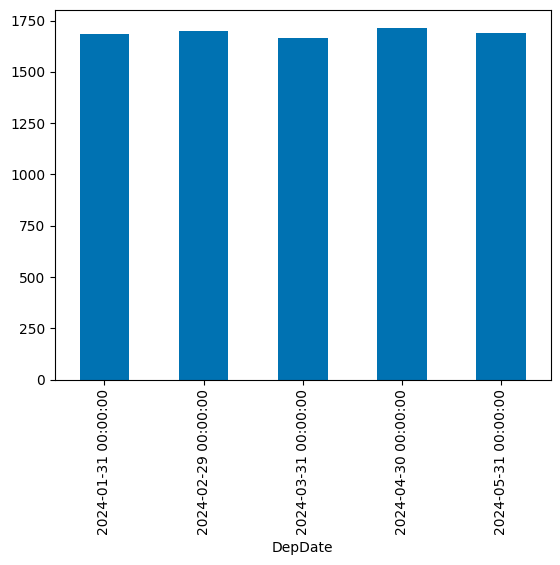

In [51]:
df_time['OP_CARRIER_FL_NUM'].resample('M').mean().plot(kind='bar')